# Nonconvex matrix factorization

The following two plots show the error of the $f(x,y) = (1-xy)^2$ in two different views.

In blue, we can see the optimal minimizers where $y=\frac{1}{x}$.

The line in red shows that this is not a convex function, as it connects two points, global minimizers, going below the function $f$.


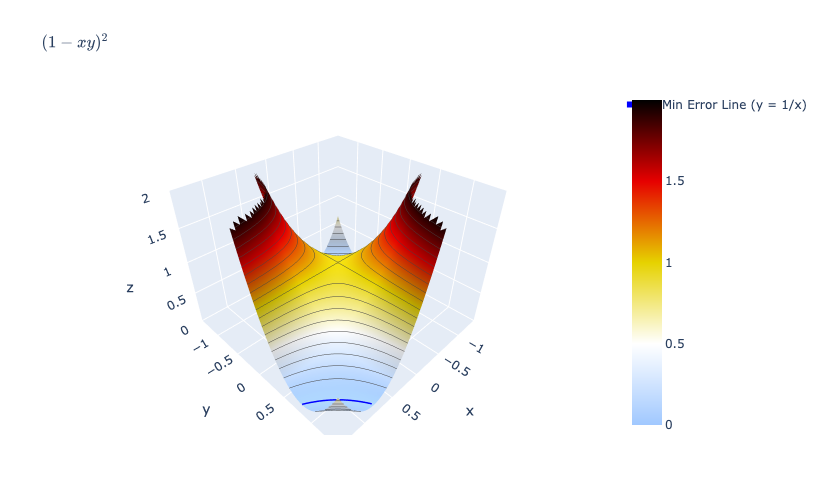

In [1]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
lim = 1.35


# Generate data
x = np.linspace(-lim, lim, 100)
y = np.linspace(-lim, lim, 100)
xGrid, yGrid = np.meshgrid(y, x)
error = (1 - xGrid * yGrid)**2
error[error>2] = np.nan

fig = go.Figure(
    data=[go.Surface(
        x=x, y=y, z=error,
        colorscale='Blackbody_r', showscale=True,
        contours = {
            "z": {"show": True, "start": 0, "end": 100, "size": .1}
        },
    ),]
    
)


# Create the line of minimal error: y = 1/x, z = 0
x_line = np.linspace(0.001, lim, 200)
# Avoid dividing by zero
x_line = x_line[np.abs(x_line) > 0.75]
y_line = 1 / x_line
z_line = np.zeros_like(x_line)

fig.add_trace(
    go.Scatter3d(
        x=x_line,
        y=y_line,
        z=z_line,
        mode='lines',
        line=dict(color='blue', width=6),
        name='Min Error Line (y = 1/x)'
    )
)


# Create the line of minimal error: y = 1/x, z = 0
x_line = np.linspace(-0.001, -lim, 200)
# Avoid dividing by zero
x_line = x_line[np.abs(x_line) > 0.75]
y_line = 1 / x_line
z_line = np.zeros_like(x_line)

fig.add_trace(
    go.Scatter3d(
        x=x_line,
        y=y_line,
        z=z_line,
        mode='lines',
        line=dict(color='blue', width=6),
        showlegend=False  #
    )
)

x_line = np.linspace(1, -1, 200)
y_line = np.linspace(1, -1, 200)
z_line = np.zeros_like(x_line)
fig.add_trace(
    go.Scatter3d(
        x=x_line,
        y=y_line,
        z=z_line,
        mode='lines',
        line=dict(color='red', width=6),
        showlegend=False  #
    )
)

fig.update_layout(
    title=dict(text='$(1-xy)^2$'),
    autosize=False,
    width=500, height=500,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        zaxis = dict(range=[0, 2]) # Limit z-axis from 10 to 50
    ),
 )
# fig.show(renderer="sphinx_gallery")
fig

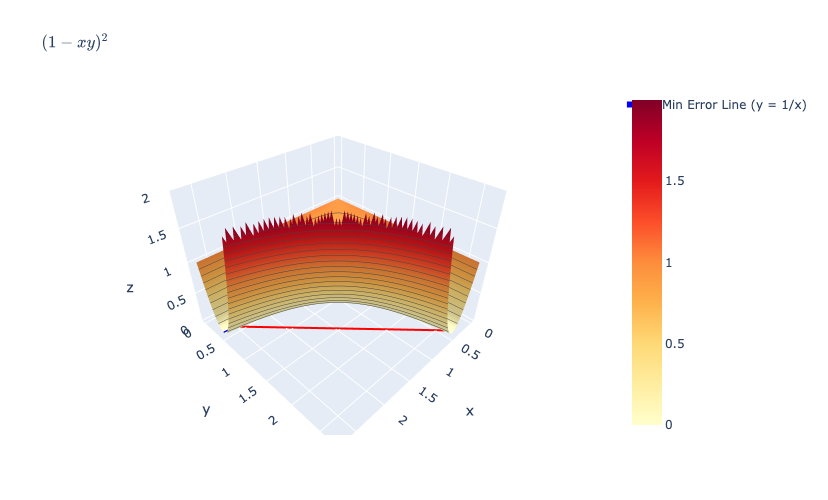

In [2]:
lim = 1.35
x = np.linspace(0, 2*lim, 100)
y = np.linspace(0, 2*lim, 100)
xGrid, yGrid = np.meshgrid(y, x)
error = (1 - xGrid * yGrid)**2
error[error>2] = np.nan
fig = go.Figure(
    data=[go.Surface(
        x=x, y=y, z=error,
        colorscale='YlOrRd',
        showscale=True,
        contours = {
            "z": {"show": True, "start": 0.0000000001, "end": 100, "size": .1}
        },
    ),]
    
)
# Create the line of minimal error: y = 1/x, z = 0
x_line = np.linspace(0.001, 2*lim, 200)
# Avoid dividing by zero
x_line = x_line[np.abs(x_line) > 0.38]
y_line = 1 / x_line
z_line = np.zeros_like(x_line)

fig.add_trace(
    go.Scatter3d(
        x=x_line,
        y=y_line,
        z=z_line,
        mode='lines',
        line=dict(color='blue', width=6),
        name='Min Error Line (y = 1/x)'
    )
)

x_line = np.linspace(0.38, 2.5, 200)
y_line = np.linspace(1/0.38, 1/2.5, 200)
z_line = np.zeros_like(x_line)
fig.add_trace(
    go.Scatter3d(
        x=x_line,
        y=y_line,
        z=z_line,
        mode='lines',
        line=dict(color='red', width=6),
        name='Min Error Line (y = 1/x)',
        showlegend=False  #
    )
)


fig.update_layout(
    title=dict(text='$(1-xy)^2$'),
    autosize=False,
    width=500, height=500,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        zaxis = dict(range=[0, 2]) # Limit z-axis from 10 to 50
    ),
 )


# fig.show(renderer="sphinx_gallery")
fig